In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
from math import radians, sin, cos, asin, sqrt

In [2]:
root_path = os.path.join(os.getcwd(), '100knock-data_analytics', '3章')

In [3]:
uselog_path = os.path.join(root_path, 'use_log.csv')
uselog = pd.read_csv(uselog_path)
print(len(uselog))
uselog

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


In [4]:
customer_path = os.path.join(root_path, 'customer_master.csv')
customer = pd.read_csv(customer_path)
print(len(customer))
customer

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0
...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0


In [5]:
classmaster_path = os.path.join(root_path, 'class_master.csv')
class_master = pd.read_csv(classmaster_path)
print(len(class_master))
class_master

3


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [6]:
campaign_path = os.path.join(root_path, 'campaign_master.csv')
campaign_master = pd.read_csv(campaign_path)
print(len(campaign_master))
campaign_master

3


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


In [7]:
customer_join = pd.merge(customer, class_master, on='class', how='left')
customer_join = pd.merge(customer_join, campaign_master, on='campaign_id', how='left')
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,オールタイム,10500,通常


In [8]:
print(len(customer))
print(len(customer_join))

4192
4192


In [9]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [10]:
customer_join.groupby('class_name').count()['customer_id']

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [11]:
customer_join.groupby('campaign_name').count()['customer_id']

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

In [12]:
customer_join.groupby('gender').count()['customer_id']

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [13]:
customer_join.groupby('is_deleted').count()['customer_id']

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [14]:
customer_join['start_date'] = pd.to_datetime(customer_join['start_date'])
customer_start = customer_join.loc[customer_join['start_date']>pd.to_datetime('20180401')]
print(len(customer_start))

1361


In [15]:
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])
customer_newer = customer_join.loc[(customer_join['end_date']>pd.to_datetime('20190331'))|(customer_join['end_date'].isna())]
print(len(customer_newer))
customer_newer['end_date'].unique()

2842


array(['NaT'], dtype='datetime64[ns]')

In [16]:
customer_newer.groupby('class_name').count()['customer_id']

class_name
オールタイム    1381
デイタイム      675
ナイト        786
Name: customer_id, dtype: int64

In [17]:
customer_newer.groupby('campaign_name').count()['customer_id']

campaign_name
入会費半額     282
入会費無料     219
通常       2341
Name: customer_id, dtype: int64

In [18]:
customer_newer.groupby('gender').count()['customer_id']

gender
F    1352
M    1490
Name: customer_id, dtype: int64

In [19]:
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['年月'] = uselog['usedate'].dt.strftime('%Y%m')
uselog_months = uselog.groupby(['年月', 'customer_id'], as_index=False).count()
uselog_months.rename(columns={'log_id': 'count'}, inplace=True)
del uselog_months['usedate']
uselog_months

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [20]:
uselog_customer = uselog_months.groupby('customer_id').agg(['mean', 'median', 'max', 'min'])['count']
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4
...,...,...,...,...,...
4187,TS995853,9.500000,9.5,11,8
4188,TS998593,8.142857,8.0,9,7
4189,TS999079,4.916667,5.5,9,2
4190,TS999231,4.666667,5.0,8,1


In [21]:
uselog

,log_id,customer_id,usedate,年月
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804
...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903
197424,L00000049209754,TS979550,2019-03-31,201903
197425,L00000049209755,TS995299,2019-03-31,201903
197426,L00000049209756,TS995853,2019-03-31,201903


In [22]:
uselog['weekday'] = uselog['usedate'].dt.weekday
uselog_weekday = uselog.groupby(['customer_id', '年月', 'weekday'], as_index=False).count()[['customer_id', '年月', 'weekday', 'log_id']]
uselog_weekday.rename(columns={'log_id': 'count'}, inplace=True)
uselog_weekday

,customer_id,年月,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


In [23]:
uselog_weekday = uselog_weekday.groupby('customer_id', as_index=False).max()[['customer_id', 'count']]
uselog_weekday['routine_flg'] = 0
uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['count']<4, 1)
uselog_weekday

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1
...,...,...,...
4187,TS995853,5,1
4188,TS998593,5,1
4189,TS999079,5,1
4190,TS999231,5,1


In [24]:
customer_join = pd.merge(customer_join, uselog_customer, on='customer_id', how='left')
customer_join = pd.merge(customer_join, uselog_weekday, on='customer_id', how='left')
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,count,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,4,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,5,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,5,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,5,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,8.000000,8.0,8,8,3,0
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,10.000000,10.0,10,10,3,0
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常,8.000000,8.0,8,8,2,0
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,11.000000,11.0,11,11,3,0


In [25]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
count               0
routine_flg         0
dtype: int64

In [26]:
from dateutil.relativedelta import relativedelta
customer_join['calc_date'] = customer_join['end_date']
customer_join['calc_date'] = customer_join['calc_date'].fillna(pd.to_datetime('20190430'))
customer_join['membership_period'] = 0
for i in range(len(customer_join)):
    delta = relativedelta(customer_join['calc_date'].iloc[i], customer_join['start_date'].iloc[i])
    customer_join.loc[i, 'membership_period'] = delta.years*12 + delta.months
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,count,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,4,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,5,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,5,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,5,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,5,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,8.000000,8.0,8,8,3,0,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,10.000000,10.0,10,10,3,0,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常,8.000000,8.0,8,8,2,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,11.000000,11.0,11,11,3,0,2019-04-30,1


In [27]:
customer_join[['mean', 'median', 'max', 'min']].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [28]:
customer_join.groupby('routine_flg').count()['customer_id']

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

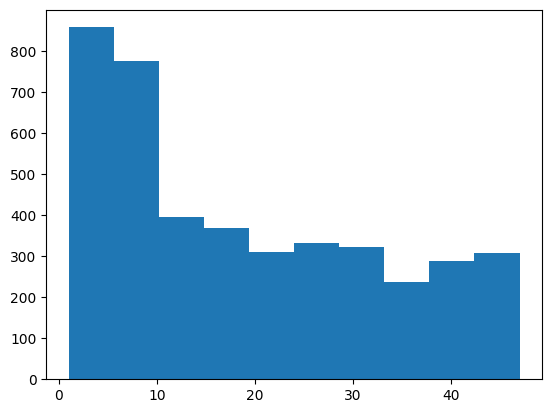

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join['membership_period'])

In [30]:
customer_end = customer_join.loc[customer_join['is_deleted']==1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,count,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,3.215556,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,1.217087,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,2.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,3.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,4.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,5.000000,1.000000,23.000000


In [31]:
customer_stay = customer_join.loc[customer_join['is_deleted']==0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,count,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,4.865588,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.406154,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,2.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,5.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,5.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,5.000000,1.000000,47.000000


In [32]:
customer_join.to_csv('customer_join.csv', index=False)